# Week 04 – Image Processing Assignment
**Student Name:**    Bo'taboyev Sherzod___________________________  
**Student ID:** __230804_______________________  
**Date:** 21 February 2026

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/opencv/download.jpeg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

## Challenge 1.1 – Gamma Correction Function

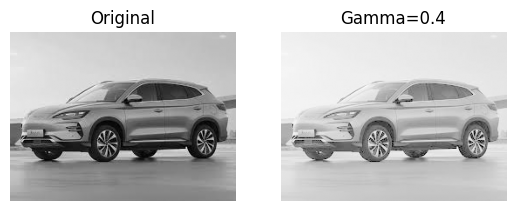

In [2]:
def gamma_correction(image, gamma):
    img_norm = image.astype('float32') / 255.0
    output = img_norm ** gamma
    return (output * 255).astype('uint8')

result = gamma_correction(img, gamma=0.4)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Gamma=0.4')
plt.axis('off')

plt.show()

## Challenge 1.2 – Gamma Curve Analysis

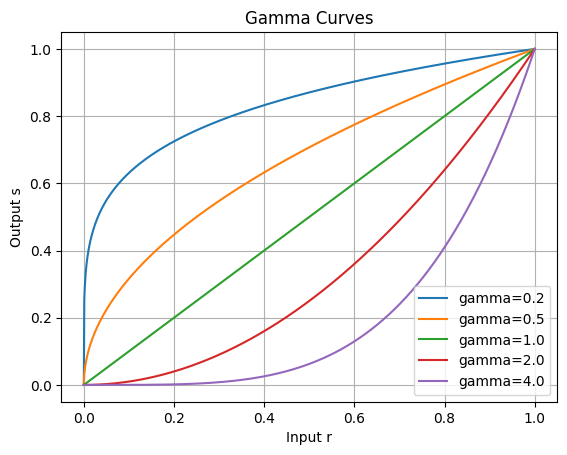

In [3]:
x = np.arange(0, 1.001, 0.001)
gamma_values = [0.2, 0.5, 1.0, 2.0, 4.0]

for g in gamma_values:
    plt.plot(x, x ** g, label=f'gamma={g}')

plt.title('Gamma Curves')
plt.xlabel('Input r')
plt.ylabel('Output s')
plt.legend()
plt.grid(True)
plt.show()

## Challenge 1.3 – Comparative Study (gamma 0.5, 1.0, 2.0)

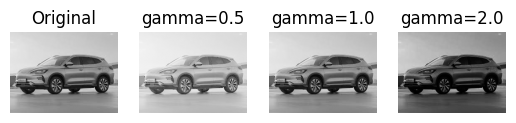

In [4]:
gammas = [0.5, 1.0, 2.0]

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, g in enumerate(gammas):
    plt.subplot(1, 4, i + 2)
    plt.imshow(gamma_correction(img, g), cmap='gray')
    plt.title(f'gamma={g}')
    plt.axis('off')

plt.show()

## Challenge 2.1 – Image Negative

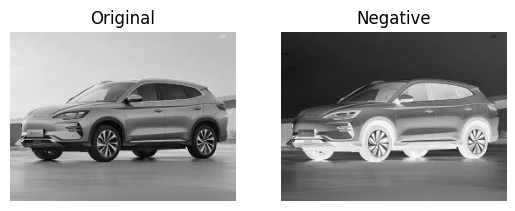

In [5]:
def image_negative(image):
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = 255 - image[i, j]
    return output

negative = image_negative(img)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative, cmap='gray')
plt.title('Negative')
plt.axis('off')

plt.show()

## Challenge 2.2 – Intensity Range Mapping

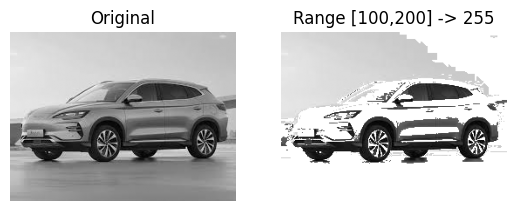

In [6]:
def intensity_range_mapping(image, A, B):
    output = image.copy()
    output[(image >= A) & (image <= B)] = 255
    return output

mapped = intensity_range_mapping(img, A=100, B=200)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mapped, cmap='gray')
plt.title('Range [100,200] -> 255')
plt.axis('off')

plt.show()

## Challenge 2.3 – Integrated Enhancement Pipeline

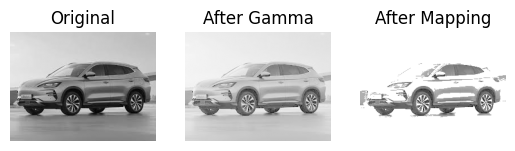

In [7]:
step1 = gamma_correction(img, gamma=0.4)
step2 = intensity_range_mapping(step1, A=180, B=255)

images = [img, step1, step2]
titles = ['Original', 'After Gamma', 'After Mapping']

for i, (im, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(im, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.show()

## Challenge 3.1 – Final Optimized Script

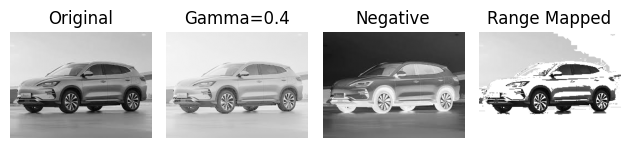

In [8]:
def gamma_correction(image, gamma):
    if image is None:
        raise ValueError('Image not found')
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_norm = image.astype('float32') / 255.0
    return (img_norm ** gamma * 255).astype('uint8')

def image_negative(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return (255 - image).astype('uint8')

def intensity_range_mapping(image, A, B):
    output = image.copy()
    output[(image >= A) & (image <= B)] = 255
    return output

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

gamma_result = gamma_correction(img, 0.4)
negative_result = image_negative(img)
mapped_result = intensity_range_mapping(img, 100, 200)

results = [img, gamma_result, negative_result, mapped_result]
titles = ['Original', 'Gamma=0.4', 'Negative', 'Range Mapped']

for i, (im, title) in enumerate(zip(results, titles)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(im, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()